# **DLthon 데이터 확인 및 분석(EDA)**

In [2]:
# 데이터 업로드

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
# 파일 로드 및 구조 확인

import json

with open("test.json", encoding="utf-8") as f:
    data = json.load(f)

type(data)

dict

In [4]:
# 내부 구조 확인

list(data.keys())[:5]

['t_000', 't_001', 't_002', 't_003', 't_004']

In [5]:
data["t_000"]

{'text': '아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요  아따 주는김에 한개더 주면 되겠네'}

In [6]:
# 데이터 프레임으로 변환

import pandas as pd

df = pd.DataFrame([
    {"id": k, "text": v["text"]}
    for k, v in data.items()
])

df.head()

,id,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...


In [7]:
# 문장 개수, 결측치 여부, 컬럼 구조 확인

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    object
 1   text    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


(500, 2)

In [10]:
# 글자수 기준

df["char_len"] = df["text"].str.len()
df["char_len"].describe()

,char_len
count,500.000000
mean,213.626000
std,101.240473
min,68.000000
25%,143.000000
50%,189.000000
75%,253.500000
max,722.000000


In [9]:
# 단어 수 기준(공백 기준)

df["token_len"] = df["text"].str.split().apply(len)
df["token_len"].describe()

,token_len
count,500.000000
mean,54.102000
std,26.137136
min,14.000000
25%,37.000000
50%,48.000000
75%,65.000000
max,192.000000


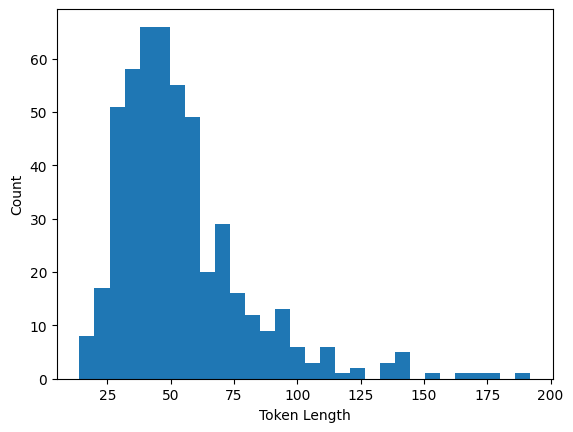

In [11]:
# 분포 시각화

import matplotlib.pyplot as plt

plt.hist(df["token_len"], bins=30)
plt.xlabel("Token Length")
plt.ylabel("Count")
plt.show()

In [12]:
# 중복 문장 분석

df["text"].duplicated().sum()

np.int64(1)

In [13]:
df = df.drop_duplicates(subset="text")

In [15]:
# 키워드 비율 분석

bad_words = ["죽", "죽여", "미친", "새끼", "맞고"]

for w in bad_words:
    ratio = df["text"].str.contains(w).mean()
    print(f"{w}: {ratio:.2%}")

죽: 19.44%
죽여: 5.81%
미친: 2.20%
새끼: 9.42%
맞고: 3.61%


In [21]:
df[df["text"].str.contains("돈")].head()

,id,text,token_len,char_len
7,t_007,야 저기야 닭꼬치 트럭왔다 응 그러네 그치? 너도 먹고 싶지? 어?나도? 그래 너 ...,41,159
9,t_009,야 너 2학년 김민석 맞지? 네 맞는데요. 혹시 누구신가요? 내가 누군지 궁금하면 ...,114,404
15,t_015,후기 내리세요. 안그러면 고소합니다. 지금 협박하시는 건가요? 협박 아니고 알려...,100,474
18,t_018,좋은말 할때 내돈갚아. 내가 왜 그래야 하지? 너가 여기 재개발 된다며. 너믿고 내...,48,197
20,t_020,너 내가 돈 갚으라고 했지!!!!! 안갚으면 죽여버릴거야 어떻게 죽일건데 내가 칼로...,35,131


In [22]:
df[df["text"].str.contains("죽|칼|때려")].head()

,id,text,token_len,char_len
6,t_006,그 사람 누구냐? 누구말하는거야? 다 알면서 모른척 하지마. 둘다 쏴버리기 전에...,65,296
10,t_010,예전에 네가 나한테 했던 일 기억하지? 너도 당해봐 예전 일이라면 내가 사과할게. ...,125,438
15,t_015,후기 내리세요. 안그러면 고소합니다. 지금 협박하시는 건가요? 협박 아니고 알려...,100,474
18,t_018,좋은말 할때 내돈갚아. 내가 왜 그래야 하지? 너가 여기 재개발 된다며. 너믿고 내...,48,197
20,t_020,너 내가 돈 갚으라고 했지!!!!! 안갚으면 죽여버릴거야 어떻게 죽일건데 내가 칼로...,35,131


In [23]:
df[df["text"].str.contains("사장|회사")].head()

,id,text,token_len,char_len
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,67,275
6,t_006,그 사람 누구냐? 누구말하는거야? 다 알면서 모른척 하지마. 둘다 쏴버리기 전에...,65,296
12,t_012,김비서 지금 우리애 학교가서 집에다가 좀 데려다 주세요 사장님 그런 개인적인 일은 ...,59,272
13,t_013,과장님 오늘 부장님 기분이 안 좋으신것 같네요 오늘 프레젠테이션 있었는데 사장님한테...,50,191
45,t_045,홍시씨 오늘 데이트 하나 봐? 엄청 힘줬네? 네? 아니 저 평상시랑 똑같은데. 그렇...,73,266


In [20]:
# 대화체 확인 표현 분석

df["text"].str.endswith("?").mean()

np.float64(0.06212424849699399)

In [19]:
df["text"].str.endswith("!").mean()

np.float64(0.05811623246492986)

In [17]:
# 단어 빈도 분석

from collections import Counter

all_words = " ".join(df["text"]).split()
counter = Counter(all_words)

counter.most_common(20)

[('내가', 311),
 ('너', 264),
 ('아', 205),
 ('좀', 204),
 ('나', 190),
 ('왜', 184),
 ('야', 167),
 ('진짜', 162),
 ('그럼', 147),
 ('아니', 140),
 ('이', 137),
 ('지금', 136),
 ('다', 134),
 ('그냥', 122),
 ('네', 120),
 ('내', 116),
 ('오늘', 111),
 ('안', 111),
 ('돈', 106),
 ('제가', 93)]

In [18]:
# 문장 유사도 분석

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["text"])

sim = cosine_similarity(X)
sim.mean()

np.float64(0.021213659097504188)

**EDA 분석 정리**

*   문장 길이 분산 : mean과 max의 차이가 큼
*   대화체 및 구어체 중심 : 물음표, 느낌표, 반복 감탄사 다수
*   위험 클래스(협박/갈취/직장내괴롭힘/기타괴롭힘) : 강한 감정 문장에 집중
*   위험 클래스 간 경계가 매우 미세
    *   “돈” 포함 문장 → 강압 맥락
    *   “죽/칼/때려” → 직접적 위협








**전처리 전략**

*   반복 기호나 공백이 많음 → 공백 정규화, 반복 감탄사 축소, 길이 제한(짧은 문장 제거)
*   위험 클래스에 대한 전처리 → 마킹만 하여 일반 대화와 경계를 더 명확
*   일반대화(합성데이터)에 대한 전처리 → 감정 중립화(감탄사 등을 제거), 위험 키워드 필터링


**합성데이터 생성 전략**

*   위험 대화와 반대되는 개념으로 설정
| 위험 대화 | 일반 대화 |
| ----- | ------------ |
| 위협·강압 | 요청·의견        |
| 돈·송금  | 일상 소비        |
| 권력 관계 | 대등한 관계       |
| 감정 과잉 | 감정 중립        |
| 명령·압박 | 설명·대화        |

*   도메인 분산(상황 구분)

    *   일상적인 잡담
    *   가족이나 친구들과의 대화
    *   수업시간의 대화
    *   취미, 음식, 날씨에 대한 정보
    *   회사에서의 부탁조 대화

*   금지어 설정 : 당장, 안 하면, 가만 안 둔다 등

*   감정 중립화 : 과도한 감탄사 제거, 토큰 길이가 너무 긴 것 제거





